In [1]:
import Augmentor
import random
# https://augmentor.readthedocs.io/en/master/
#https://augmentor.readthedocs.io/en/master/userguide/mainfeatures.html#perspective-skewing    

In [17]:
path = 'C:/Users/sdf80/Desktop/TotalClass_2ch/SideBad/'
number = 400 - 255

In [18]:
img = Augmentor.Pipeline(path)

## 좌우 반전
img.flip_left_right(probability=0.7) 

## 상하 반전
img.flip_top_bottom(probability=0.7)

## 왜곡
img.random_distortion(probability=0.7, grid_width=15, grid_height=15, magnitude=2)
#img.rotate(probability=1, max_left_rotation=15, max_right_rotation=15)
img.rotate_without_crop(probability=1, max_left_rotation=25, max_right_rotation=25)
img.skew(0.7,0.2)
#img.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)

## 증강 이미지 수
img.sample(number)

Processing <PIL.Image.Image image mode=RGB size=300x300 at 0x219F2A53700>:   1%| | 1/145 [00:00<00:22,  6.39 Samples/s]

Initialised with 255 image(s) found.
Output directory set to C:/Users/sdf80/Desktop/TotalClass_2ch/SideBad/output.

Processing <PIL.Image.Image image mode=RGB size=300x300 at 0x219F28FCE20>: 100%|█| 145/145 [00:02<00:00, 67.06 Samples/


In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm 
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
def image_augmentation( old_base_dir = 'C:/Users/sdf80/Desktop/fruit_dataset_augmentation/TotalClass/old/',
                        new_base_dir = 'C:/Users/sdf80/Desktop/fruit_dataset_augmentation/TotalClass/new/',
                        old_dir = 'FrontNormal',
                        new_dir = 'FrontNormal',
                        image_name='FrontNormal', 
                        iterations = 10,
                        batch_size = 5,
                        rotation_range_=0,
                        width_shift_range_ = 0.0,
                        height_shift_range_ = 0.0,
                        shear_range_=0.0,
                        horizontal_flip_=False,
                        vertical_flip_=False,
                        IsWriteImage = True,
                        IsShowImage= False, k = 1):
    
    full_old_dir = os.path.join(old_base_dir, old_dir)
    full_new_dir = os.path.join(new_base_dir, new_dir)
    
    datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=rotation_range_,
                                 width_shift_range = width_shift_range_,
                                 height_shift_range = height_shift_range_,
                                 shear_range=shear_range_,
                                 #zoom_range=0.2,
                                 horizontal_flip=horizontal_flip_,
                                 vertical_flip=vertical_flip_)
    # class_mode=None 일 경우 파일 단위로 데이터가 있어야하고 1개 클래스로는 생성 불가 파일 최소 2개 이상
    generator = datagen.flow_from_directory(full_old_dir,
                                            batch_size=batch_size,
                                            class_mode=None,
                                            target_size=(160, 160))
    images = []
    for i in range(iterations):
        img = generator.next()
        #if(len(label) == iterations):
        if(IsShowImage):        
            n_img = len(img)
            base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)
            for idx in range(n_img - 1):
                img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
                base = np.hstack((base, img2))
            images.append(base)
        if(IsWriteImage): 
            img = img * 255
            for j in range(len(img)):
                final_img = cv2.cvtColor(img[j], cv2.COLOR_RGB2BGR)
                data_dir = os.path.join(full_new_dir, f'{image_name}.{k}.jpg')
                cv2.imwrite(data_dir, final_img)
                k = k+1
        
    if(IsShowImage):
        img = images[0]
        for idx in range(len(images) - 1):
            img = np.vstack((img, images[idx + 1]))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        fig = plt.figure(figsize=(30,10))
        plt.imshow(img)
    return k

Found 34 images belonging to 1 classes.
64


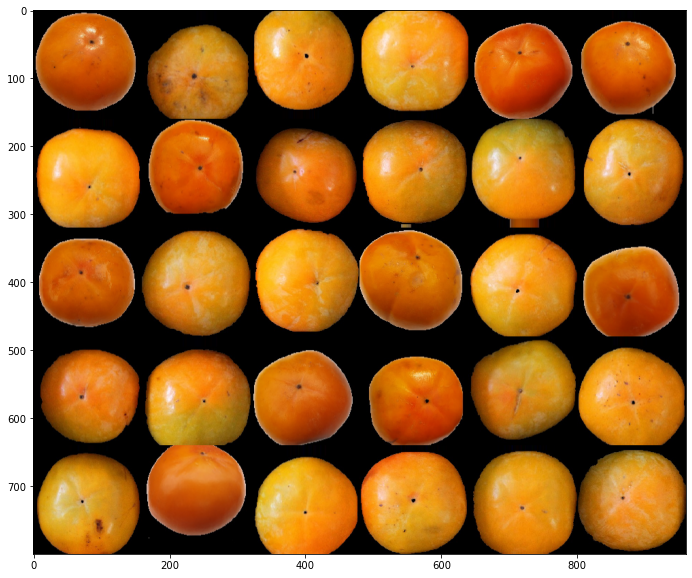

In [8]:
k = image_augmentation( iterations = 5,
                        batch_size = 6,
                        height_shift_range_ = 0.1,
                        shear_range_=0.1,
                        IsWriteImage = True,
                        IsShowImage= True, k = 34)
print(k)

In [ ]:
image_augmentation(train_test_dir_ = 'train',image_name='aug_width_data',
                        iterations = 30,
                        batch_size = 20,
                        rotation_range_=360,
                        width_shift_range_ = 0.1,
                        horizontal_flip_=True,
                        vertical_flip_=True)